In [ ]:
pip install optuna

In [ ]:
import gdown
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.inspection import permutation_importance

In [ ]:
# Locate and download the dataset
file_id = '1MOf3tbcxVuWV76nvnh_xBjaalITWO0th'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'marketing_campaign.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1MOf3tbcxVuWV76nvnh_xBjaalITWO0th
To: /content/marketing_campaign.csv
100%|██████████| 220k/220k [00:00<00:00, 5.52MB/s]


'marketing_campaign.csv'

In [ ]:
df = pd.read_csv('marketing_campaign.csv')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Remove the ID column since it is not meaningful analysing the feauture
df = df.drop('ID', axis=1)

In [ ]:
df.isna().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [ ]:
# Replace missing values with the median
df.loc[pd.isna(df.loc[:,'Income']), 'Income'] = df.loc[:,'Income'].median()

# Check the missing values agian
pd.isna(df).sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [ ]:
for feature in df.columns:
  missing_value = (df.loc[:,feature] == '?').sum()
  print(feature, missing_value)

Year_Birth 0
Education 0
Marital_Status 0
Income 0
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Z_CostContact 0
Z_Revenue 0
Response 0


In [ ]:
# Check the data types
df.dtypes

,0
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64
MntFruits,int64


In [ ]:
df.shape

(2240, 28)

In [ ]:
df_categorical = df.loc[:,['Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']]
df_ordinal = df.loc[:,'Education']
df_numerical = df.loc[:,['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']]
y = df.loc[:,'Response']

In [ ]:
df_categorical.dtypes

,0
Marital_Status,object
AcceptedCmp1,int64
AcceptedCmp2,int64
AcceptedCmp3,int64
AcceptedCmp4,int64
AcceptedCmp5,int64
Complain,int64


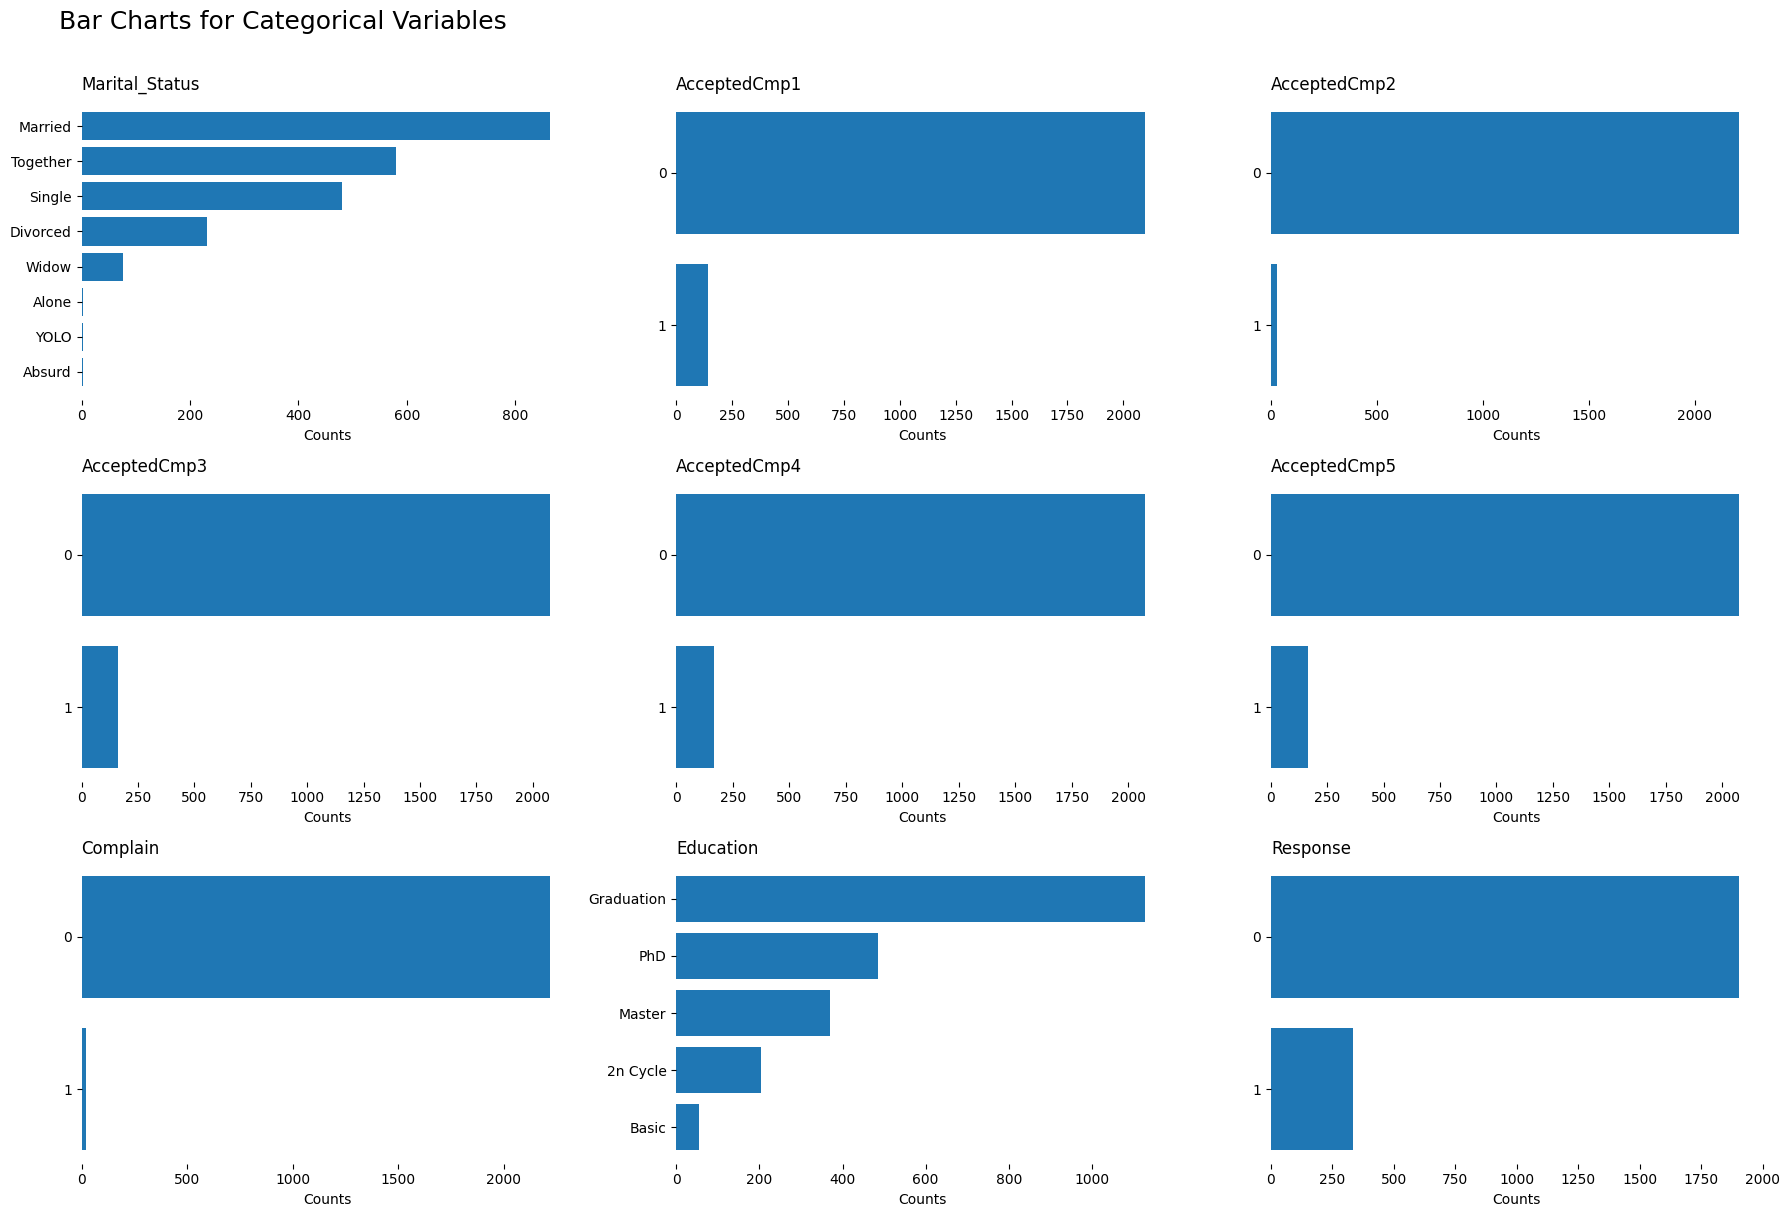

In [ ]:
df_for_plot = pd.concat([df_categorical, df_ordinal, y], axis=1)

fig = plt.figure(figsize=(18, 12))

fig.suptitle('Bar Charts for Categorical Variables', fontsize=18, x=0.16, y=1.01)

for i, feature in enumerate(df_for_plot.columns):
  plt.subplot(3, 3, i+1)
  plt.barh(df_for_plot.loc[:,feature].value_counts().sort_values(ascending=True).index.astype(str), df_for_plot.loc[:,feature].value_counts().sort_values(ascending=True))
  plt.title(feature, loc='left')
  ax = plt.gca()
  ax.set_frame_on(False)
  plt.xlabel('Counts')
  plt.tight_layout()

In [ ]:
df_for_plot_discrete = df.loc[:,['Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

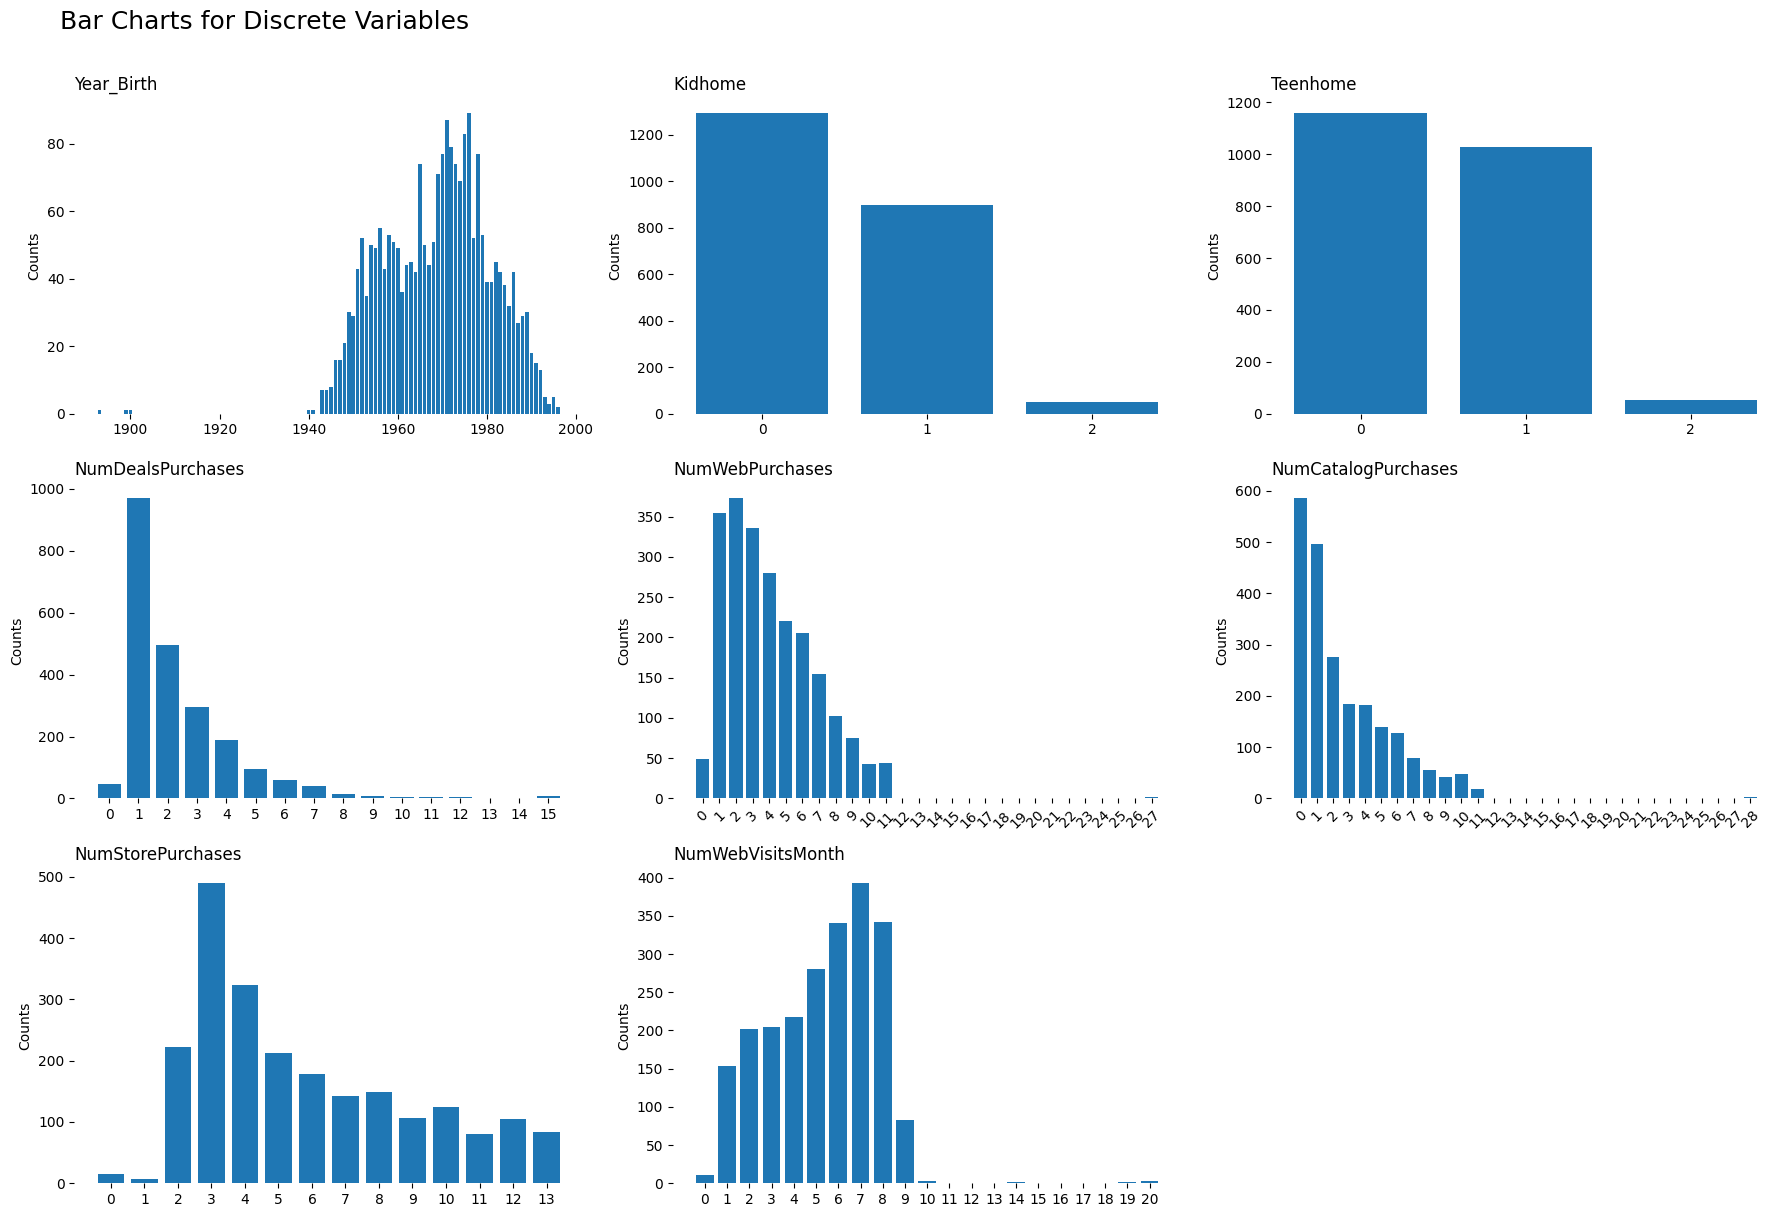

In [ ]:
fig = plt.figure(figsize=(18, 12))

fig.suptitle('Bar Charts for Discrete Variables', fontsize=18, x=0.15, y=1.01)

for i, features in enumerate(df_for_plot_discrete.columns):
  plt.subplot(3,3,i+1)
  plt.bar(np.unique(df_for_plot_discrete.loc[:,features]), df_for_plot_discrete.loc[:,features].value_counts().sort_index().values)
  plt.title(features, loc='left')
  ax = plt.gca()
  ax.set_frame_on(False)
  if i != 0:
    plt.xticks(np.arange(np.min(df_for_plot_discrete.loc[:,features]), np.max(df_for_plot_discrete.loc[:,features]+1), 1))
  if len(np.arange(np.min(df_for_plot_discrete.loc[:,features]), np.max(df_for_plot_discrete.loc[:,features]+1), 1)) > 25 and i != 0:
    plt.xticks(rotation=45, ha='center')
  plt.ylabel('Counts')
  plt.tight_layout()

In [ ]:
df_for_plot_continuous_list = []

In [ ]:
for features in df_numerical.columns:
  if features in df_for_plot_discrete:
    df_for_plot_continuous_list.append(False)
  else:
    df_for_plot_continuous_list.append(True)

df_for_plot_continuous = df_numerical.copy()
df_for_plot_continuous = df_for_plot_continuous[df_for_plot_continuous.columns[df_for_plot_continuous_list]]

In [ ]:
df_for_plot_continuous

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Z_CostContact,Z_Revenue
0,58138.0,58,635,88,546,172,88,88,3,11
1,46344.0,38,11,1,6,2,1,6,3,11
2,71613.0,26,426,49,127,111,21,42,3,11
3,26646.0,26,11,4,20,10,3,5,3,11
4,58293.0,94,173,43,118,46,27,15,3,11
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,3,11
2236,64014.0,56,406,0,30,0,0,8,3,11
2237,56981.0,91,908,48,217,32,12,24,3,11
2238,69245.0,8,428,30,214,80,30,61,3,11


In [ ]:
df_for_plot_continuous.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Z_CostContact',
       'Z_Revenue'],
      dtype='object')

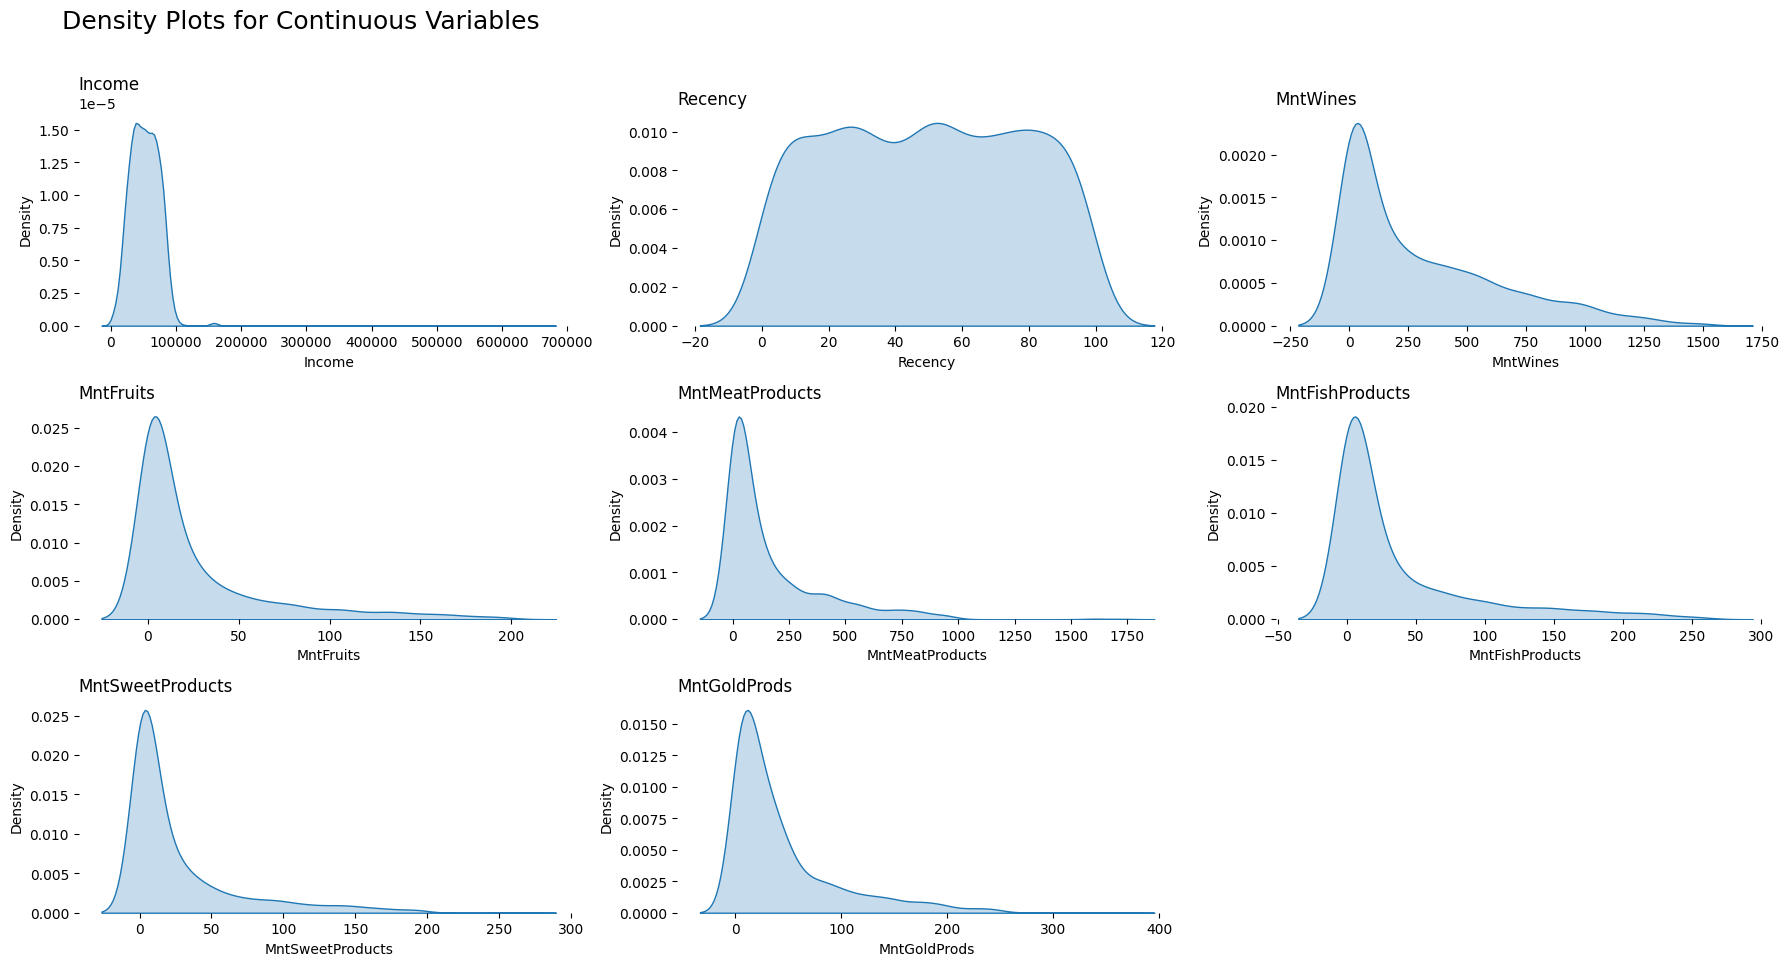

In [ ]:
fig = plt.figure(figsize=(18, 12))

fig.suptitle('Density Plots for Continuous Variables', fontsize=18, x=0.17, y=1.01)

for i, features in enumerate(df_for_plot_continuous.columns):
  if i > 7:
    break
  else:
    plt.subplot(4,3,i+1)
    sns.kdeplot(df_for_plot_continuous.loc[:,features], fill=True)
    ax = plt.gca()
    ax.set_frame_on(False)
    plt.title(features, loc='left')
    plt.tight_layout()

In [ ]:
df_categorical_dummy = pd.get_dummies(df_categorical, drop_first=True)

In [ ]:
df_categorical_dummy = df_categorical_dummy.astype(int)

In [ ]:
df_categorical_dummy.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_ordinal.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
education_mapping = {'Basic':0, '2n Cycle':1, 'Master':2, 'Graduation':3, 'PhD':4}

df_ordinal_map = df_ordinal.map(education_mapping)

In [ ]:
df_ordinal_map

,Education
0,3
1,3
2,3
3,3
4,4
...,...
2235,3
2236,4
2237,3
2238,2


In [ ]:
sc = StandardScaler()

df_numerical_sc = sc.fit_transform(df_numerical)
df_numerical_sc = pd.DataFrame(df_numerical_sc, columns=df_numerical.columns)

In [ ]:
df_numerical_sc

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0.0,0.0
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0.0,0.0
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.0,0.0
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0.0,0.0
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,0.0,0.0
2236,-1.903435,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,0.0,0.0
2237,1.017761,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,0.0,0.0
2238,-1.068807,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,0.0,0.0


In [ ]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_result = calc_vif(df_numerical_sc)
vif_result

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
0,Year_Birth,1.230760
1,Income,2.165415
2,Kidhome,1.857653
3,Teenhome,1.584940
4,Recency,1.005771
5,MntWines,2.653868
6,MntFruits,1.935668
7,MntMeatProducts,2.868657
8,MntFishProducts,2.080393
9,MntSweetProducts,1.895804


In [ ]:
df_numerical_sc = df_numerical_sc.drop(df_numerical_sc.columns[[-1,-2]], axis=1)

In [ ]:
df_ready_to_model = pd.concat([df_categorical_dummy, df_ordinal_map, df_numerical_sc], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_ready_to_model, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

In [ ]:
y_train_copy = y_train.copy()

y_train_copy = y_train_copy.astype(str)

Text(0.0, 1.0, 'Counts for the Two Labels')

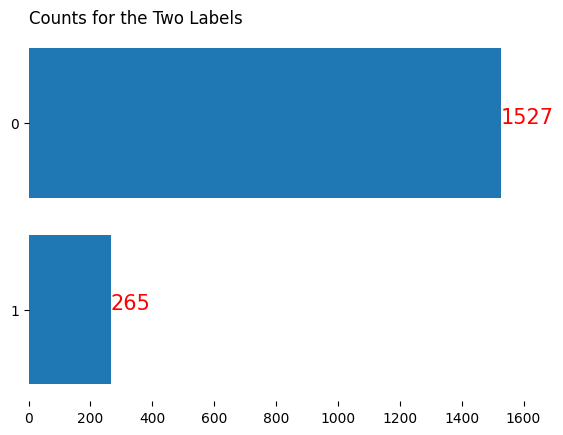

In [ ]:
plt.barh(y_train_copy.value_counts().sort_values().index.astype(str), y_train_copy.value_counts().sort_values())
for i, counts in y_train_copy.value_counts().sort_values().items():
  plt.text(counts, i, f'{counts}', color='red', fontsize=15)
ax = plt.gca()
ax.set_frame_on(False)
plt.title('Counts for the Two Labels', loc='left')

In [ ]:
train_df_0 = train_df[train_df.loc[:,'Response'] == 0]
train_df_1 = train_df[train_df.loc[:,'Response'] == 1]

train_df_0 = train_df_0.reset_index(drop=True)
train_df_1 = train_df_1.reset_index(drop=True)

In [ ]:
train_df_balanced = pd.concat([train_df_1]*7 + [train_df_0], axis=0)

In [ ]:
train_df_balanced.shape

(3382, 31)

In [ ]:
X_train = train_df_balanced.drop(train_df_balanced.columns[-1], axis=1)

In [ ]:
y_train = train_df_balanced.iloc[:,-1]

In [ ]:
y_train

,Response
0,1
1,1
2,1
3,1
4,1
...,...
1522,0
1523,0
1524,0
1525,0


In [ ]:
model = LogisticRegression(solver= "liblinear", random_state = 42)

In [ ]:
sfs = SFS(model,
      k_features="best",  # Select the best number of features
      forward=True,        # Forward selection
      floating=False,      # Not Floating steps
      cv=5,                # 5-fold cross-validation
      verbose=1)           # Show progress

# Fit the SFS model on the training data
sfs = sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)

Features: 30/30

Selected features: ['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp5', 'Complain', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Education', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntMeatProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       379
           1       0.38      0.71      0.50        69

    accuracy                           0.78       448
   macro avg       0.66      0.75      0.68       448
weighted avg       0.85      0.78      0.80       448



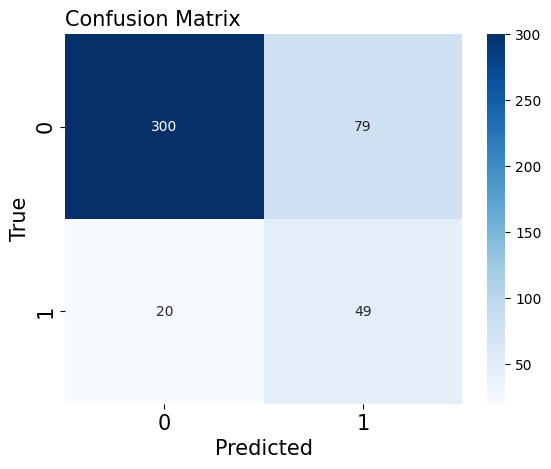

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.title('Confusion Matrix', loc='left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7790178571428571

In [ ]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.411077
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 3382
Model:                          Logit   Df Residuals:                     3359
Method:                           MLE   Df Model:                           22
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.4029
Time:                        02:24:54   Log-Likelihood:                -1390.3
converged:                       True   LL-Null:                       -2328.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
AcceptedCmp2                2.0441      0.455      4.493      0.000       1.152   

In [ ]:
coefficients = model.params
coefficients

,0
AcceptedCmp2,2.044078
AcceptedCmp3,1.777752
AcceptedCmp5,2.669814
Complain,-0.275719
Marital_Status_Alone,-1.204867
Marital_Status_Divorced,-1.574997
Marital_Status_Married,-2.664382
Marital_Status_Single,-1.631206
Marital_Status_Together,-2.929316
Marital_Status_Widow,-1.225561


In [ ]:
feature_importance_numerical = []

for features in coefficients.index:
  if features in df_categorical_dummy.columns:
    feature_importance_numerical.append(False)
  else:
    feature_importance_numerical.append(True)

In [ ]:
feature_importance_numerical = coefficients[feature_importance_numerical]

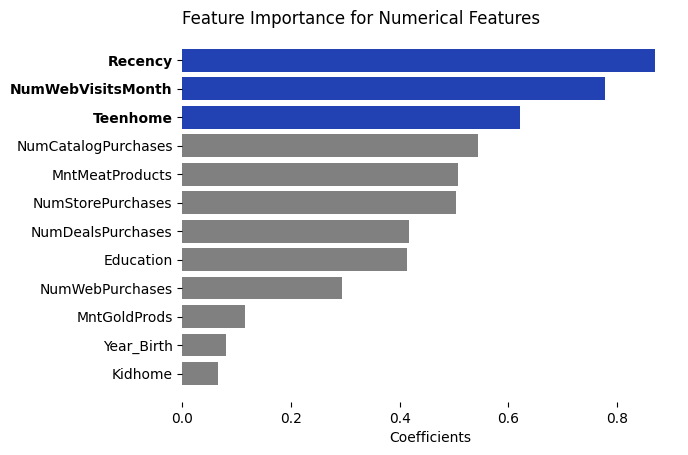

In [ ]:
features = np.array(feature_importance_numerical.index.to_list())
coef_array = np.array(feature_importance_numerical)


sorted_index = np.abs(coef_array).argsort()

color_mapping = ['grey']*(len(coef_array)-3) + ['#2242b4']*3

plt.barh(features[sorted_index], np.abs(coef_array)[sorted_index], color=color_mapping)
ax = plt.gca()
ax.set_frame_on(False)
plt.xlabel('Coefficients')
plt.title('Feature Importance for Numerical Features', loc='left')

yticklabels = plt.gca().get_yticklabels()
for idx, label in enumerate(yticklabels):
    if idx >= len(coef_array)-3:
        label.set_fontweight('bold')

In [ ]:
feature_importance_categorical = []

for features in coefficients.index:
  if features in df_categorical_dummy.columns:
    feature_importance_categorical.append(True)
  else:
    feature_importance_categorical.append(False)

In [ ]:
feature_importance_categorical

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
feature_importance_categorical = coefficients[feature_importance_categorical]

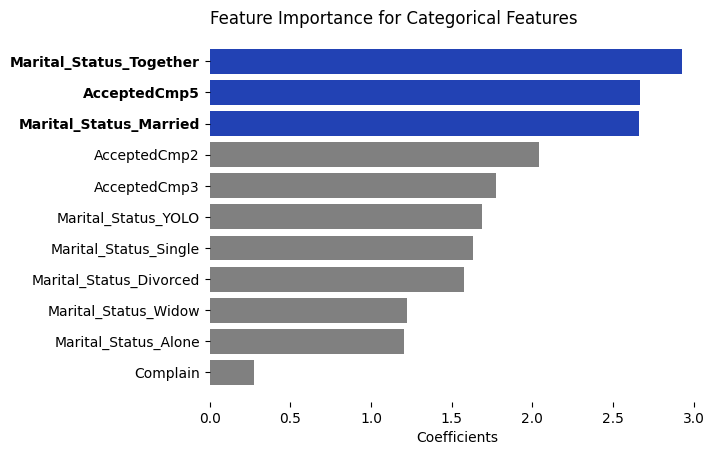

In [ ]:
features = np.array(feature_importance_categorical.index.to_list())
coef_array = np.array(feature_importance_categorical)


sorted_index = np.abs(coef_array).argsort()

color_mapping = ['grey']*(len(coef_array)-3) + ['#2242b4']*3

plt.barh(features[sorted_index], np.abs(coef_array)[sorted_index], color=color_mapping)
ax = plt.gca()
ax.set_frame_on(False)
plt.xlabel('Coefficients')
plt.title('Feature Importance for Categorical Features', loc='left')

yticklabels = plt.gca().get_yticklabels()
for idx, label in enumerate(yticklabels):
    if idx >= len(coef_array)-3:
        label.set_fontweight('bold')

In [ ]:
def objective(trial):
    # Select a kernel based on random values
    kernel_value = trial.suggest_float('kernel', 0.0, 1.0)


    if kernel_value <= 0.5:
        kernel = 'linear'
        gamma = 'scale'  # linear kernels do not need a gamma value
    else:
        kernel = 'rbf'
        gamma = trial.suggest_float('gamma', 1e-4, 1e1, log=True)  # rbf kernel should need a gamma value

    # Define "C", another hyperparameter
    C = trial.suggest_float('C', 1e-5, 1e3, log=True)

    # Define and train an SVM model
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train, y_train)  # Train the model

    accuracy = model.score(X_test, y_test)  # Evaluate the performance on the testing dataset
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2024-11-22 02:24:55,449] A new study created in memory with name: no-name-21636827-24d9-4fcd-a0a2-341d3b52ec2a


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-11-22 02:24:56,474] Trial 0 finished with value: 0.15401785714285715 and parameters: {'kernel': 0.9902035541093018, 'gamma': 1.7925510625718926, 'C': 0.058420090105535054}. Best is trial 0 with value: 0.15401785714285715.
[I 2024-11-22 02:24:57,225] Trial 1 finished with value: 0.5401785714285714 and parameters: {'kernel': 0.016559009365338273, 'C': 0.0002262683107341416}. Best is trial 1 with value: 0.5401785714285714.
[I 2024-11-22 02:24:58,273] Trial 2 finished with value: 0.15401785714285715 and parameters: {'kernel': 0.6331592626206617, 'gamma': 0.0421695337097931, 'C': 0.0002610312183989638}. Best is trial 1 with value: 0.5401785714285714.
[I 2024-11-22 02:24:58,677] Trial 3 finished with value: 0.8526785714285714 and parameters: {'kernel': 0.9281950914017209, 'gamma': 7.758181249594687, 'C': 319.13438206777977}. Best is trial 3 with value: 0.8526785714285714.
[I 2024-11-22 02:24:59,100] Trial 4 finished with value: 0.7857142857142857 and parameters: {'kernel': 0.79329437

In [ ]:
# Obtain the optimal hyperparameters
best_params = study.best_params
print(best_params)

{'kernel': 0.9952901071122645, 'gamma': 0.730241971892846, 'C': 0.23211414470063166}


In [ ]:
if best_params['kernel'] <= 0.5:
  svm_kernel = 'linear'
else:
  svm_kernel = 'rbf'

svm_kernel

'rbf'

In [ ]:
model = SVC(C = best_params['C'], kernel = svm_kernel, gamma = best_params['gamma'])
model.fit(X_train, y_train)

SVC(C=0.23211414470063166, gamma=0.730241971892846)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8571428571428571


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       379
           1       0.62      0.19      0.29        69

    accuracy                           0.86       448
   macro avg       0.74      0.58      0.60       448
weighted avg       0.83      0.86      0.82       448



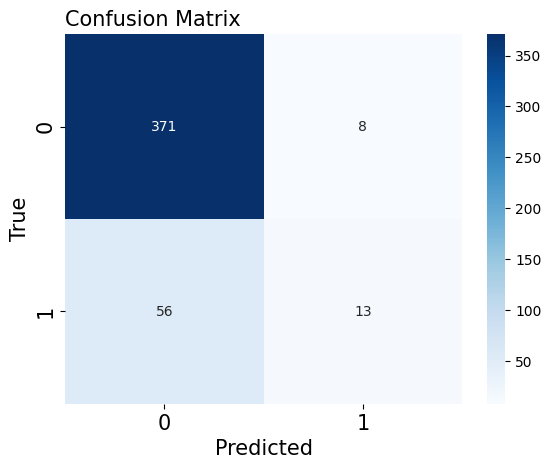

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.title('Confusion Matrix', loc='left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test)

In [ ]:
perm_importance

{'importances_mean': array([ 0.        ,  0.00357143,  0.00223214,  0.        ,  0.        ,
         0.00267857,  0.00535714,  0.003125  ,  0.00178571, -0.00089286,
         0.        ,  0.00089286,  0.00491071,  0.00758929,  0.00625   ,
         0.02053571,  0.00758929,  0.00089286,  0.01026786,  0.00491071,
         0.00714286,  0.01160714,  0.01116071]),
 'importances_std': array([0.        , 0.00227635, 0.        , 0.        , 0.        ,
        0.00089286, 0.00109352, 0.00501115, 0.0026031 , 0.00109352,
        0.        , 0.00575183, 0.00167038, 0.00671129, 0.00328057,
        0.00516778, 0.00575183, 0.00459626, 0.0036268 , 0.00682904,
        0.00971944, 0.00725361, 0.00509007]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00446429,  0.00446429,  0.        ,  0.00223214,  0.00669643],
        [ 0.00223214,  0.00223214,  0.00223214,  0.00223214,  0.00223214],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  

In [ ]:
feature_importance_numerical_series = pd.Series(perm_importance.importances_mean, index=X_test.columns)
feature_importance_numerical_series

,0
AcceptedCmp2,0.000000
AcceptedCmp3,0.003571
AcceptedCmp5,0.002232
Complain,0.000000
Marital_Status_Alone,0.000000
Marital_Status_Divorced,0.002679
Marital_Status_Married,0.005357
Marital_Status_Single,0.003125
Marital_Status_Together,0.001786
Marital_Status_Widow,-0.000893


In [ ]:
feature_importance_numerical = []

for features in feature_importance_numerical_series.index:
  if features in df_categorical_dummy.columns:
    feature_importance_numerical.append(False)
  else:
    feature_importance_numerical.append(True)

feature_importance_numerical

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [ ]:
feature_importance_numerical = feature_importance_numerical_series[feature_importance_numerical]
feature_importance_numerical

,0
Education,0.000893
Year_Birth,0.004911
Kidhome,0.007589
Teenhome,0.006250
Recency,0.020536
MntMeatProducts,0.007589
MntGoldProds,0.000893
NumDealsPurchases,0.010268
NumWebPurchases,0.004911
NumCatalogPurchases,0.007143


In [ ]:
features = np.array(feature_importance_numerical.index)

feature_importance_numerical = np.array(feature_importance_numerical)
sorted_idx = np.abs(feature_importance_numerical).argsort()

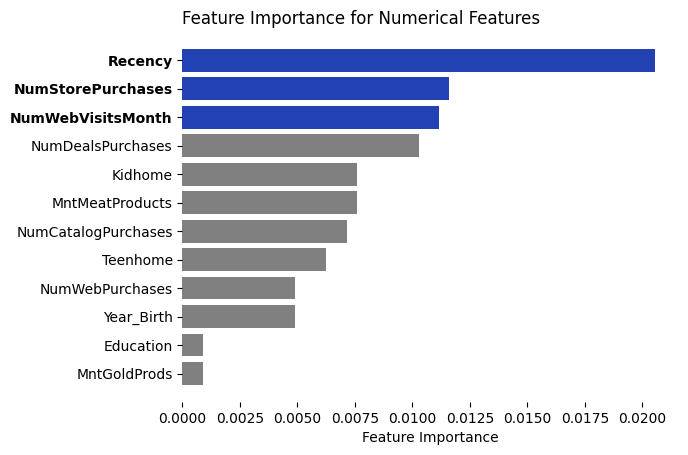

In [ ]:
color_mapping = ['grey']*(len(feature_importance_numerical)-3) + ['#2242b4']*3

plt.barh(features[sorted_idx], np.abs(feature_importance_numerical)[sorted_idx], color=color_mapping)
plt.xlabel("Feature Importance")
plt.title('Feature Importance for Numerical Features', loc='left')

yticklabels = plt.gca().get_yticklabels()
for idx, label in enumerate(yticklabels):
    if idx >= len(feature_importance_numerical)-3:
        label.set_fontweight('bold')

ax = plt.gca()
ax.set_frame_on(False)

In [ ]:
feature_importance_categorical_series = pd.Series(perm_importance.importances_mean, index=X_test.columns)
feature_importance_categorical_series

,0
AcceptedCmp2,0.000000
AcceptedCmp3,0.003571
AcceptedCmp5,0.002232
Complain,0.000000
Marital_Status_Alone,0.000000
Marital_Status_Divorced,0.002679
Marital_Status_Married,0.005357
Marital_Status_Single,0.003125
Marital_Status_Together,0.001786
Marital_Status_Widow,-0.000893


In [ ]:
feature_importance_categorical = []

for features in feature_importance_categorical_series.index:
  if features in df_categorical_dummy.columns:
    feature_importance_categorical.append(True)
  else:
    feature_importance_categorical.append(False)

feature_importance_categorical

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
feature_importance_categorical = feature_importance_categorical_series[feature_importance_categorical]
feature_importance_categorical

,0
AcceptedCmp2,0.000000
AcceptedCmp3,0.003571
AcceptedCmp5,0.002232
Complain,0.000000
Marital_Status_Alone,0.000000
Marital_Status_Divorced,0.002679
Marital_Status_Married,0.005357
Marital_Status_Single,0.003125
Marital_Status_Together,0.001786
Marital_Status_Widow,-0.000893


In [ ]:
features = np.array(feature_importance_categorical.index)

feature_importance_categorical = np.array(feature_importance_categorical)
sorted_idx = np.abs(feature_importance_categorical).argsort()

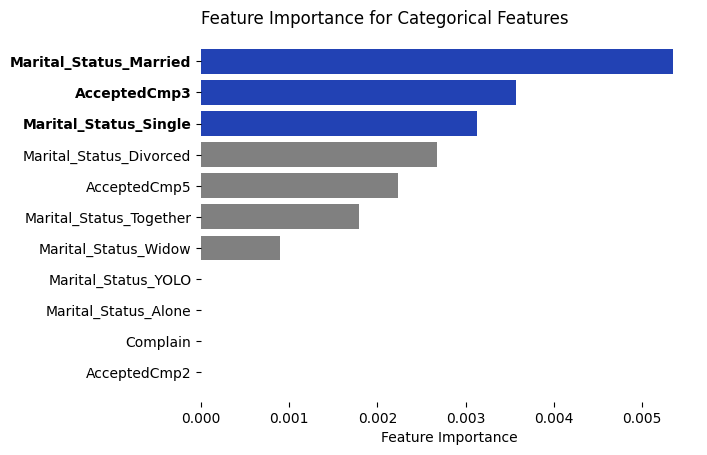

In [ ]:
color_mapping = ['grey']*(len(feature_importance_categorical)-3) + ['#2242b4']*3

plt.barh(features[sorted_idx], np.abs(feature_importance_categorical)[sorted_idx], color=color_mapping)
plt.xlabel("Feature Importance")
plt.title('Feature Importance for Categorical Features', loc='left')

yticklabels = plt.gca().get_yticklabels()
for idx, label in enumerate(yticklabels):
    if idx >= len(feature_importance_categorical)-3:
        label.set_fontweight('bold')

ax = plt.gca()
ax.set_frame_on(False)